# Trabajo Practico 3

<p style='text-align: justify;'>
    En el presente trabajo practico se utilizará la siguiente imagen:
</p>

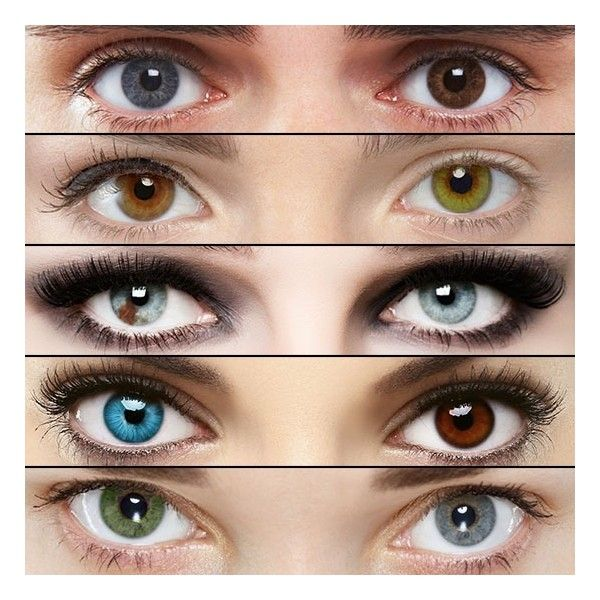

<p style='text-align: justify;'>
    Con el objetivo de:
    
   * Encontrar la posición de los iris en cada par de ojos y mida su distancia en píxeles.
   * Encuentre la posición de las pupilas en cada par de ojos y mida su distancia en píxeles.   
</p>



In [1]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
# %matplotlib inline
%matplotlib

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

Using matplotlib backend: Qt5Agg


### Deteccion de Iris

In [2]:
# Leemos la imagen
#=================

img = cv.imread('eyes.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

# Suavizamos la imagen
#=====================
gray = cv.medianBlur(gray,5)

cv.imshow('Ojos',gray)
cv.waitKey(0)
cv.destroyAllWindows()

Hacemos uso de la forma circular del iris y utilizamos la funcion de opencv, HoughCircles:

In [3]:
# (imagen en grises, método, flag de resolución del acumulador, dist mín entre centros de círculos
# umbral alto de Canny, umbral del acumulador, radio_min, radio_max)
#===================================================================

img_iris = img.copy()
iris = cv.HoughCircles(gray,cv.HOUGH_GRADIENT,1,minDist=5,param1=100,param2=40,minRadius=10,maxRadius=50)

iris = np.uint16(np.around(iris))

for i in iris[0,:]:
    # Dibujamos el círculo externo
    cv.circle(img_iris,(i[0],i[1]),i[2],(0,255,0),2)
    # Dibujamos el centro del círculo
    cv.circle(img_iris,(i[0],i[1]),2,(0,0,255),3)

cv.imshow('detected circles',img_iris)
cv.waitKey(0)
cv.destroyAllWindows()

In [22]:
print(iris)

[[[132 504  34]
  [464 514  32]
  [150  80  29]
  [144 188  33]
  [464 418  30]
  [460 180  32]
  [458  80  27]
  [138 296  30]
  [448 292  32]
  [136 416  27]]]


In [5]:
#Ordenos los circulos en orden ascendente segun su coordenada en el eje Y:
iris_detected = np.int32(iris[0,np.argsort(iris[0,:,1],axis=0)])
print(iris_detected)

x = np.arange(0,iris.shape[1],2)
dist_x = np.abs(iris_detected[x,0]-iris_detected[x+1,0])
dist_y = np.abs(iris_detected[x,1]-iris_detected[x+1,1])

for i in range(x.shape[0]):
    print(f"\nEl par de ojos {i}, esta distanciado por {dist_x[i]} pixeles en la coordenada X y por {dist_y[i]} pixeles en las coordenadas Y.")
    print(f"Distancia {np.sqrt(dist_x[i]**2+dist_y[i]**2)}")

[[150  80  29]
 [458  80  27]
 [460 180  32]
 [144 188  33]
 [448 292  32]
 [138 296  30]
 [136 416  27]
 [464 418  30]
 [132 504  34]
 [464 514  32]]

El par de ojos 0, esta distanciado por 308 pixeles en la coordenada X y por 0 pixeles en las coordenadas Y.
Distancia 308.0

El par de ojos 1, esta distanciado por 316 pixeles en la coordenada X y por 8 pixeles en las coordenadas Y.
Distancia 316.10124960208555

El par de ojos 2, esta distanciado por 310 pixeles en la coordenada X y por 4 pixeles en las coordenadas Y.
Distancia 310.0258053775524

El par de ojos 3, esta distanciado por 328 pixeles en la coordenada X y por 2 pixeles en las coordenadas Y.
Distancia 328.0060975042995

El par de ojos 4, esta distanciado por 332 pixeles en la coordenada X y por 10 pixeles en las coordenadas Y.
Distancia 332.150568266863


### Deteccion de pupilas

In [6]:
# Obtenemos los círculos por la transformada de Hough
# (imagen en grises, método, flag de resolución del acumulador, dist mín entre centros de círculos
# umbral alto de Canny, umbral del acumulador, radio_min, radio_max)
#===================================================================

img_pupilas = img.copy()
pupilas = cv.HoughCircles(gray,cv.HOUGH_GRADIENT,1.5,minDist=14,param1=150,param2=28,minRadius=5,maxRadius=18)

pupilas = np.uint16(np.around(pupilas))

Ordenamos las detecciones segun la coordenada del eje Y:

In [7]:
pupilas_detected = np.int32(pupilas[0,np.argsort(pupilas[0,:,1],axis=0)])
print(pupilas_detected)

[[151  80  10]
 [455  80  13]
 [ 79 104  10]
 [461 182  11]
 [143 190  10]
 [445 295   9]
 [139 295  10]
 [455 305  14]
 [100 307  14]
 [490 308  16]
 [103 335  10]
 [122 340   9]
 [ 53 391  11]
 [545 412  12]
 [136 413  12]
 [463 419  10]
 [133 505  14]
 [464 515  11]]


Se hace uso de la posicion detectada de los iris para descartar al

In [8]:
d_min = 13

pupilas_verify = np.zeros(iris_detected.shape)

j = 0
for i in range(pupilas.shape[1]):
    dist = np.sqrt((pupilas_detected[i,0]-iris_detected[:,0])**2)+((pupilas_detected[i,1]-iris_detected[:,1])**2)
    if (dist < d_min).any():
        print(f"Se encontro pupila en {pupilas_detected[i,:]}, distancia al iris mas cercano {dist.min()}")
        # Dibujamos el círculo externo
        cv.circle(img_pupilas,(pupilas_detected[i,0],pupilas_detected[i,1]),pupilas_detected[i,2],(0,255,0),2)
        # Dibujamos el centro del círculo
        cv.circle(img_pupilas,(pupilas_detected[i,0],pupilas_detected[i,1]),2,(0,0,255),3)
        pupilas_verify[j,:] = pupilas_detected[i,:]
        j += 1

cv.imshow('detected circles',img_pupilas)
cv.waitKey(0)
cv.destroyAllWindows()

Se encontro pupila en [151  80  10], distancia al iris mas cercano 1.0
Se encontro pupila en [455  80  13], distancia al iris mas cercano 3.0
Se encontro pupila en [461 182  11], distancia al iris mas cercano 5.0
Se encontro pupila en [143 190  10], distancia al iris mas cercano 5.0
Se encontro pupila en [445 295   9], distancia al iris mas cercano 12.0
Se encontro pupila en [139 295  10], distancia al iris mas cercano 2.0
Se encontro pupila en [136 413  12], distancia al iris mas cercano 9.0
Se encontro pupila en [463 419  10], distancia al iris mas cercano 2.0
Se encontro pupila en [133 505  14], distancia al iris mas cercano 2.0
Se encontro pupila en [464 515  11], distancia al iris mas cercano 1.0


In [9]:
x_p = np.arange(0,iris.shape[1],2)
dist_x = np.abs(iris_detected[x_p,0]-iris_detected[x_p+1,0])
dist_y = np.abs(iris_detected[x_p,1]-iris_detected[x_p+1,1])

for i in range(x_p.shape[0]):
    print(f"\nEl par de pupilas {i}, esta distanciado por {dist_x[i]} pixeles en la coordenada X y por {dist_y[i]} pixeles en las coordenadas Y.")
    print(f"Distancia {np.sqrt(dist_x[i]**2+dist_y[i]**2)}")


El par de pupilas 0, esta distanciado por 308 pixeles en la coordenada X y por 0 pixeles en las coordenadas Y.
Distancia 308.0

El par de pupilas 1, esta distanciado por 316 pixeles en la coordenada X y por 8 pixeles en las coordenadas Y.
Distancia 316.10124960208555

El par de pupilas 2, esta distanciado por 310 pixeles en la coordenada X y por 4 pixeles en las coordenadas Y.
Distancia 310.0258053775524

El par de pupilas 3, esta distanciado por 328 pixeles en la coordenada X y por 2 pixeles en las coordenadas Y.
Distancia 328.0060975042995

El par de pupilas 4, esta distanciado por 332 pixeles en la coordenada X y por 10 pixeles en las coordenadas Y.
Distancia 332.150568266863


Elementos detectados

In [15]:
img_out = img.copy()

iris_detected2 = np.int32(iris_detected)
pupilas_verify2 = np.int32(pupilas_verify)

print(iris_detected2,pupilas_verify2)
for i in range(pupilas_verify.shape[0]):
    # Dibujamos el círculo externo
    cv.circle(img_out,(iris_detected2[i,0],iris_detected2[i,1]),iris_detected2[i,2],(255,0,0),2)
    # Dibujamos el centro del círculo
    cv.circle(img_out,(iris_detected2[i,0],iris_detected2[i,1]),2,(255,0,255),3)
    # Dibujamos el círculo externo
    cv.circle(img_out,(pupilas_verify2[i,0],pupilas_verify2[i,1]),pupilas_verify2[i,2],(0,255,0),2)
    # Dibujamos el centro del círculo
    cv.circle(img_out,(pupilas_verify2[i,0],pupilas_verify2[i,1]),2,(0,0,255),3)
    
cv.imshow('detected circles',img_out)
cv.waitKey(0)
cv.destroyAllWindows()

10
[[150  80  29]
 [458  80  27]
 [460 180  32]
 [144 188  33]
 [448 292  32]
 [138 296  30]
 [136 416  27]
 [464 418  30]
 [132 504  34]
 [464 514  32]] [[151  80  10]
 [455  80  13]
 [461 182  11]
 [143 190  10]
 [445 295   9]
 [139 295  10]
 [136 413  12]
 [463 419  10]
 [133 505  14]
 [464 515  11]]
[150  80  29]
[151  80  10]
[458  80  27]
[455  80  13]
[460 180  32]
[461 182  11]
[144 188  33]
[143 190  10]
[448 292  32]
[445 295   9]
[138 296  30]
[139 295  10]
[136 416  27]
[136 413  12]
[464 418  30]
[463 419  10]
[132 504  34]
[133 505  14]
[464 514  32]
[464 515  11]
